In [6]:
import numpy as np
from scipy import ndimage
from skimage import io, color

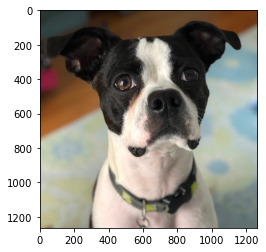

In [7]:

photo = io.imread("module-5-assets/pebbles.jpg")

import matplotlib.pyplot as plt
plt.imshow(photo)


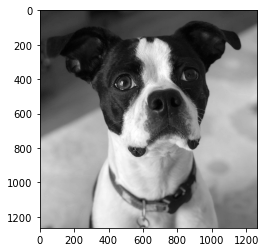

In [8]:
bw = color.rgb2gray(photo)
plt.imshow(bw, cmap='gray')

## Bluring and Smoothing

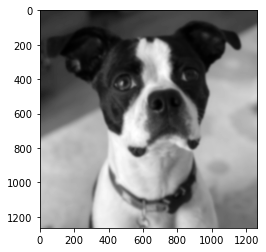

In [9]:


# Blur photo
import matplotlib.pyplot as plt
blur_photo = ndimage.gaussian_filter(bw, sigma=5)
plt.imshow(blur_photo, cmap='gray')



## Sharpening 

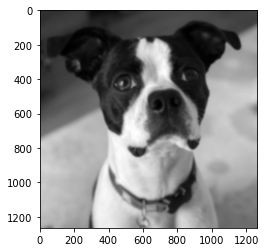

In [10]:
filter_blurred_f = ndimage.gaussian_filter(blur_photo, 1)
alpha = 10
sharpened = blur_photo + alpha * (blur_photo - filter_blurred_f)
plt.imshow(sharpened, cmap='gray')

# Denoising
----------------------------------------

Create a noisy image.


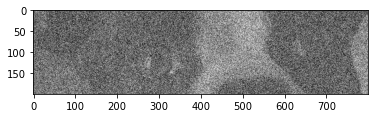

In [11]:
# Create a noisy image
face = bw[300:500, 200:1000]
noisy = face + 10 * face.std() * np.random.random(face.shape)
plt.imshow(noisy, cmap='gray')

## Denoising an Image Filter
This example shows the original image, the noisy image, the denoised
one (with the median filter) and the difference between the two.

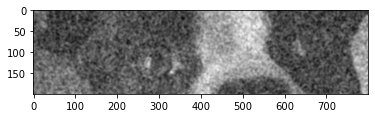

In [12]:
# Gaussian filter
plt.imshow(ndimage.gaussian_filter(noisy, 2), cmap='gray')

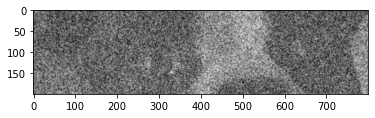

In [13]:
# Median filter
plt.imshow(ndimage.median_filter(noisy, 3), cmap='gray')

## Comparing Images

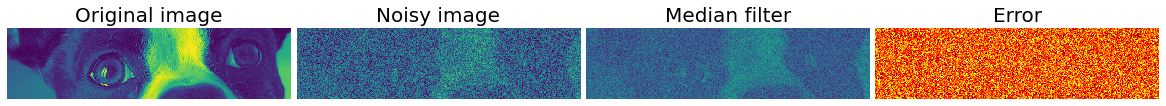

In [14]:
# https://scipy-lectures.org/advanced/image_processing/#opening-and-writing-to-image-files
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

im = face
im_noise = noisy
im_med = ndimage.median_filter(noisy, 3)

plt.figure(figsize=(16, 5))

plt.subplot(141)
plt.imshow(im, interpolation='nearest')
plt.axis('off')
plt.title('Original image', fontsize=20)
plt.subplot(142)
plt.imshow(im_noise, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Noisy image', fontsize=20)
plt.subplot(143)
plt.imshow(im_med, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Median filter', fontsize=20)
plt.subplot(144)
plt.imshow(np.abs(im - im_med), cmap=plt.cm.hot, interpolation='nearest')
plt.axis('off')
plt.title('Error', fontsize=20)


plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)

plt.show()